# CYBERSECURITY -SuspiciousWebThreatInteractions ANALYSIS

# IMPORTING THE LIBRARIES

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# DATA COLLECTION

In [114]:
df=pd.read_csv("C:/Users/91808/CloudWatch_Traffic_Web_Attack.csv")

In [115]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [99]:
df.index

RangeIndex(start=0, stop=282, step=1)

In [5]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [6]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [7]:
df.tail()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
281,9032,5862,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


# DATA CLEANING

In [8]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [116]:
df=df.dropna()

In [117]:
checking_duplicates=df.duplicated()

In [118]:
print(checking_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
277    False
278    False
279    False
280    False
281    False
Length: 282, dtype: bool


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

# DATA PROCESSING

In [120]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [121]:
df.nunique()

bytes_in               260
bytes_out              239
creation_time           30
end_time                30
src_ip                  28
src_ip_country_code      7
protocol                 1
response.code            1
dst_port                 1
dst_ip                   1
rule_names               1
observation_name         1
source.meta              1
source.name              1
time                    30
detection_types          1
dtype: int64

In [122]:
df['creation_time']=pd.to_datetime(df['creation_time'])

In [123]:
df['end_time']=pd.to_datetime(df['end_time'])

In [124]:
df['time']=pd.to_datetime(df['time'])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object             
 12  source.meta          2

In [126]:
df['Duration_time']=(df['end_time']-df['creation_time']).dt.total_seconds()

In [127]:
df['Duration_time']

0      600.0
1      600.0
2      600.0
3      600.0
4      600.0
       ...  
277    600.0
278    600.0
279    600.0
280    600.0
281    600.0
Name: Duration_time, Length: 282, dtype: float64

In [128]:
#extracting hour,day,weekday
df['hour']=df['time'].dt.hour
df['day']=df['time'].dt.day
df['weekday']=df['time'].dt.weekday

 # Cybersecurity Dataset Exploratory Data Analysis (EDA): Understanding Traffic, Alerts, and Attack Patterns

1.Distribution of Incoming & Outgoing Web Traffic

In [220]:
# Objective: Understand the distribution and range of inbound and outbound bytes to identify traffic volume patterns and 
#            detect potential anomalies or outliers.

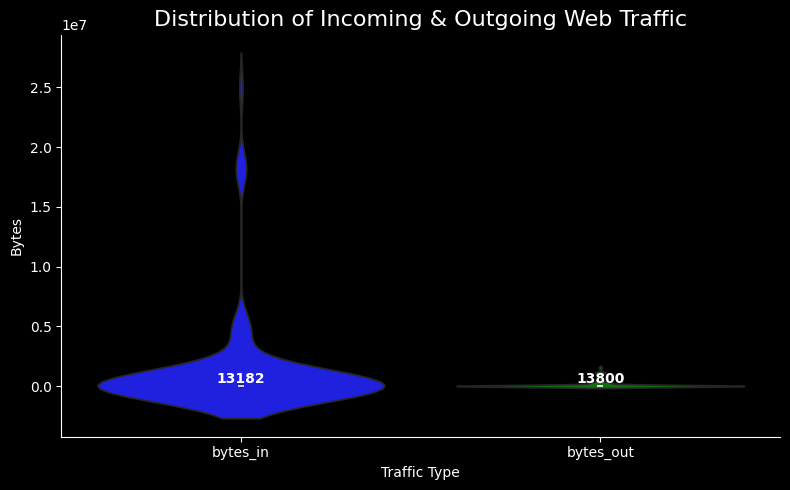

In [282]:
df_long = pd.melt(df, value_vars=['bytes_in', 'bytes_out'], var_name='Traffic Type', value_name='Bytes')
medians = df_long.groupby('Traffic Type')['Bytes'].median()
fig, ax = plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
sns.violinplot(x='Traffic Type', y='Bytes', data=df_long, palette=['blue', 'green'], ax=ax)
for i, traffic_type in enumerate(medians.index):
    median_val = medians[traffic_type]
    ax.text(i, median_val, f'{median_val:.0f}', color='white', ha='center', va='bottom', fontweight='bold')
ax.set_title('Distribution of Incoming & Outgoing Web Traffic', color='white', fontsize=16)
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
plt.tight_layout()
plt.show()

2.Web Traffic Analysis Over Time

In [219]:
# Objective: Analyze web traffic trends over time to observe peaks, drops, and patterns in incoming and outgoing network traffic.

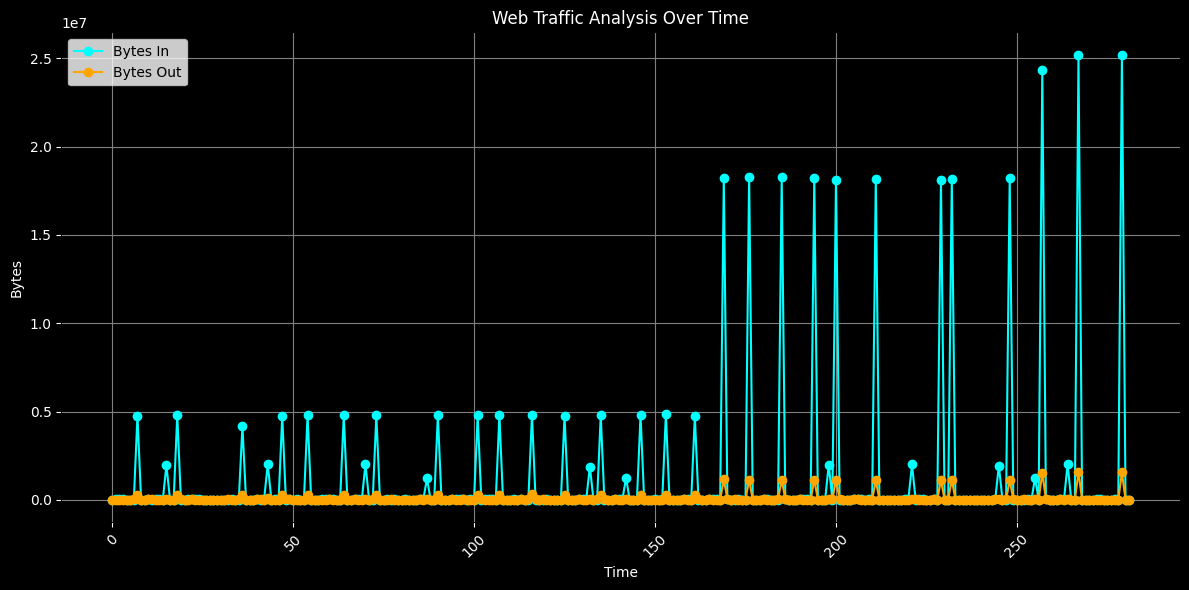

In [177]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.plot(df.index, df['bytes_in'], label='Bytes In', marker='o', color='cyan')
ax.plot(df.index, df['bytes_out'], label='Bytes Out', marker='o', color='orange')
ax.set_title('Web Traffic Analysis Over Time', color='white')
ax.set_xlabel('Time', color='white')
ax.set_ylabel('Bytes', color='white')
ax.tick_params(colors='white')
ax.legend()
ax.grid(True, color='gray')
plt.xticks(rotation=45)
plt.tight_layout()

 3. Temporal Web Traffic Trends by Hour

In [211]:
# Objective: Visualize traffic distribution by hour of the day to identify daily usage cycles and peak traffic hours.

In [267]:
hourly=df.groupby('hour')[['bytes_in', 'bytes_out']].sum().reset_index()

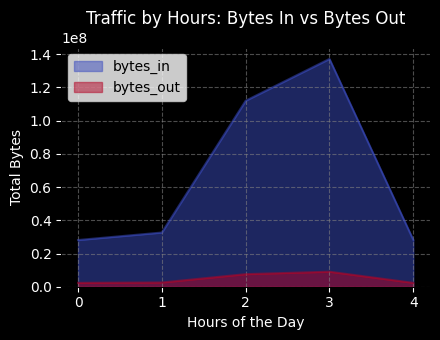

In [266]:
fig, ax = plt.subplots(figsize=(4.5, 3.5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
hourly[['bytes_in', 'bytes_out']].plot(kind='area', stacked=False, alpha=0.5, cmap='coolwarm', ax=ax)
plt.legend()
plt.ylabel('Total Bytes', color='white')
plt.xlabel('Hours of the Day', color='white')
plt.title('Traffic by Hours: Bytes In vs Bytes Out', color='white')
plt.grid(True, linestyle='--', alpha=0.6, color='gray')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.show()

4. Time Series of Attack Frequency

In [218]:
#Objective:Track the frequency of detected attacks over time (hourly) to monitor attack trends and identify potential spikes or attack windows.

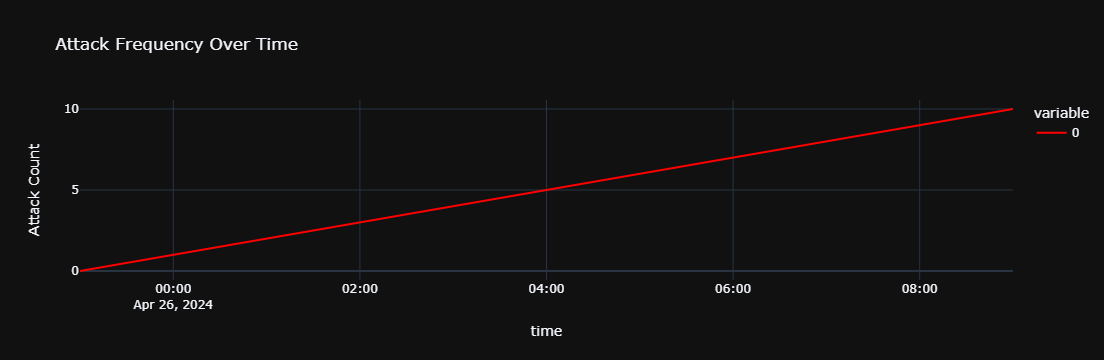

In [271]:
df.set_index('time')
hourly = df.resample('H', on='time').size()
fig = px.line(hourly, title='Attack Frequency Over Time', labels={'value': 'Attack Count'},color_discrete_sequence=['red'])
fig.update_layout(template='plotly_dark')
fig.show()

5.  Daily Frequency of Web Application Firewall (WAF) Rule Triggers

In [214]:
# Objective: Monitor daily counts of WAF detections to assess the security alert volume and detect any unusual 
#            increases in firewall rule triggers.

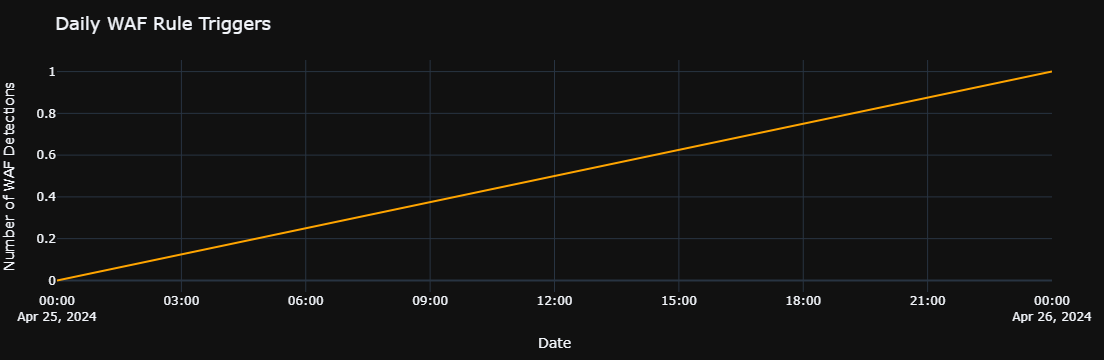

In [167]:
df['date'] = df['time'].dt.date
daily_attacks = df.groupby('date')['detection_types'].count().reset_index(name='WAF Trigger Count')
fig_daily = px.line(daily_attacks,x='date',y='WAF Trigger Count',title='Daily WAF Rule Triggers',color_discrete_sequence=['orange'],
                    labels={'date': 'Date', 'WAF Trigger Count': 'WAF Trigger Count'})
fig_daily.update_layout(template='plotly_dark',title_font_size=18,xaxis_title='Date',yaxis_title='Number of WAF Detections',
                        hovermode='x unified',margin=dict(l=40, r=40, t=60, b=40))
fig_daily.update_traces(line=dict(width=2), marker=dict(size=4))
fig_daily.show()

6. Detection Types Distribution Across Countries


In [215]:
# Objective: Compare the frequency of different types of detections across countries to identify geographic patterns in attack types.

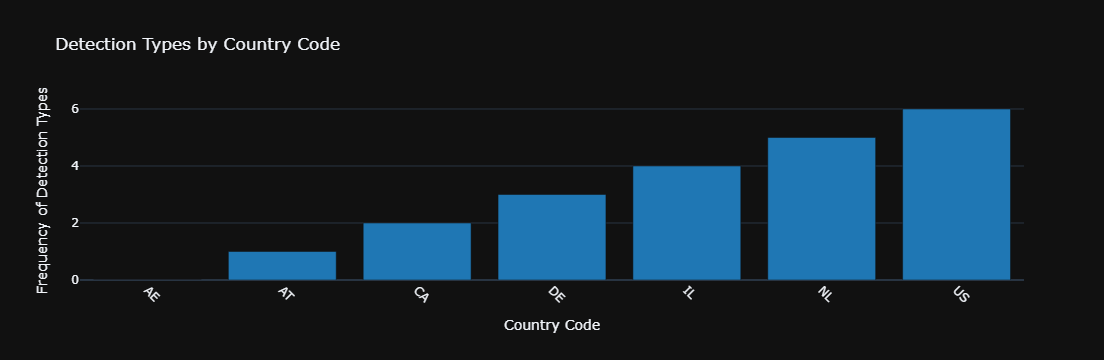

In [193]:
detection_types_by_country = pd.crosstab(df['src_ip_country_code'], df['detection_types']).reset_index()
df_long = detection_types_by_country.melt(id_vars='src_ip_country_code', var_name='Detection Type', value_name='Frequency')
fig = px.bar(df_long,  x='src_ip_country_code', y='Frequency', title='Detection Types by Country Code', 
             labels={'src_ip_country_code':'Country Code', 'Frequency':'Frequency of Detection Types'},template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.D3 )
fig.update_layout(xaxis_tickangle=45, barmode='stack')
fig.show()

7. Top 10 Source IP Addresses by Detection Count


In [216]:
# Objective: Identify the most frequent source IP addresses involved in detected attacks to prioritize investigation or blocking.


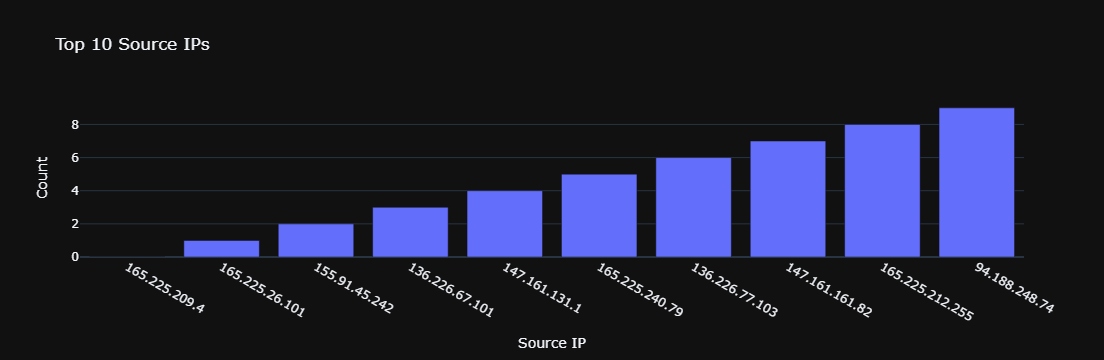

In [203]:
top_ips = df['src_ip'].value_counts().head(10).reset_index()
top_ips.columns = ['Source IP', 'Count']
fig = px.bar(top_ips, x='Source IP', y='Count', title='Top 10 Source IPs',color='Count')
fig.update_layout(template='plotly_dark')
fig.show()

8. Weekly and Hourly Alert Heatmap

In [217]:
# Objective: Explore temporal alert patterns by day of the week and hour to uncover recurring peak periods and optimize monitoring efforts.


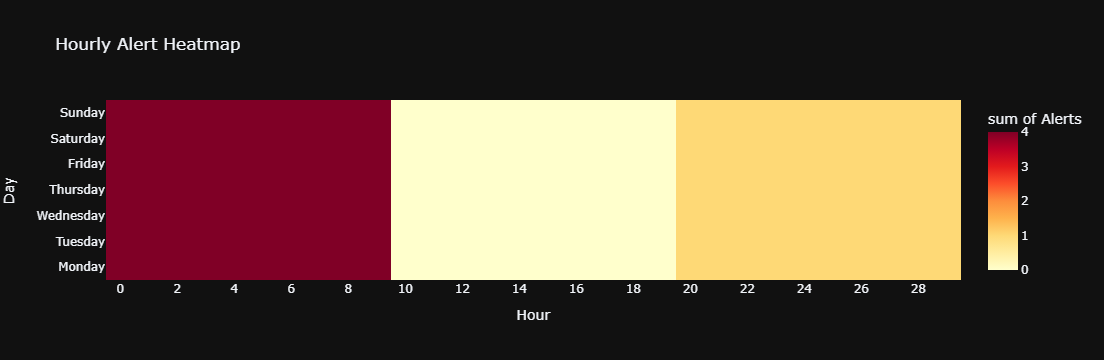

In [74]:
df['weekday_name'] = df['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
pivot = df.pivot_table(index='weekday_name', columns='hour', aggfunc='size', fill_value=0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)
pivot = pivot.reset_index()
pivot_long = pivot.melt(id_vars='weekday_name', var_name='Hour', value_name='Alert Count')
fig = px.density_heatmap(pivot_long,x='Hour',y='weekday_name',z='Alert Count',color_continuous_scale='YlOrRd',
                         labels={'weekday_name': 'Day', 'Hour': 'Hour', 'Alert Count': 'Alerts'},
title='Hourly Alert Heatmap')
fig.update_layout(template='plotly_dark', xaxis_nticks=24)
fig.show()

# Model 1: Classification Model

In [229]:
# Real-Time Cyber Threat Detection using Random Forest Classifier

#This model identifies and classifies known attack patterns based on labeled data (detection_types).

# Preprocessing & Feature Engineering:

In [222]:
df = df.dropna(subset=['detection_types'])
le_target = LabelEncoder()
df['detection_encoded'] = le_target.fit_transform(df['detection_types'])
features = ['bytes_in', 'bytes_out', 'dst_port']  


In [223]:
df['src_ip_country_code_enc'] = LabelEncoder().fit_transform(df['src_ip_country_code'].astype(str))
df['protocol_enc'] = LabelEncoder().fit_transform(df['protocol'].astype(str))

In [224]:
features = ['src_ip_country_code_enc', 'protocol_enc']
X = df[features]
y = df['detection_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier

In [225]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

              precision    recall  f1-score   support

    waf_rule       1.00      1.00      1.00        57

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



C:\Users\91808\anaconda3\envs\tf310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



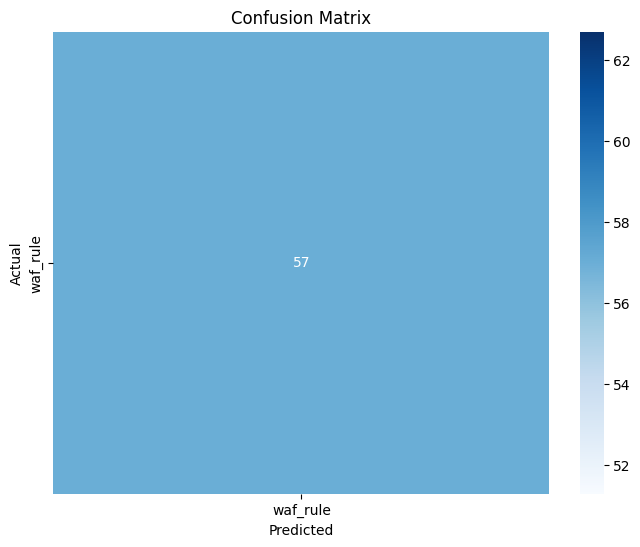

In [226]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_target.classes_))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model 2: Anomaly Detection Model

In [230]:
# Behavior-Based Intrusion Detection using Isolation Forest

#This model flags unknown or rare attacks by detecting outliers in network behavior.



# Prepare Data (numeric + encoded features)

In [232]:
features = ['bytes_in', 'bytes_out', 'dst_port']
df['src_ip_country_code_enc'] = LabelEncoder().fit_transform(df['src_ip_country_code'].astype(str))
df['protocol_enc'] = LabelEncoder().fit_transform(df['protocol'].astype(str))
features = ['src_ip_country_code_enc', 'protocol_enc']
X = df[features]

# Train Isolation Forest

In [235]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # contamination ~ expected outlier % (tune it)
iso_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

# Predict Anomalies

In [236]:
df['anomaly_score'] = iso_forest.decision_function(X)  
df['anomaly_label'] = iso_forest.predict(X)

In [237]:
print(df['anomaly_label'].value_counts())  

anomaly_label
1    282
Name: count, dtype: int64


# Visualize Anomalies

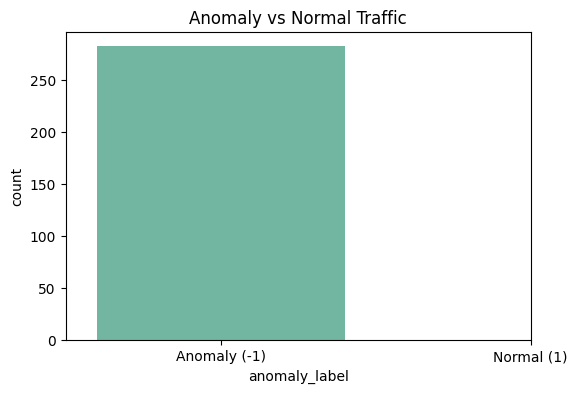

In [238]:
plt.figure(figsize=(6,4))
sns.countplot(x='anomaly_label', data=df, palette='Set2')
plt.title("Anomaly vs Normal Traffic")
plt.xticks(ticks=[0, 1], labels=['Anomaly (-1)', 'Normal (1)'])
plt.show()

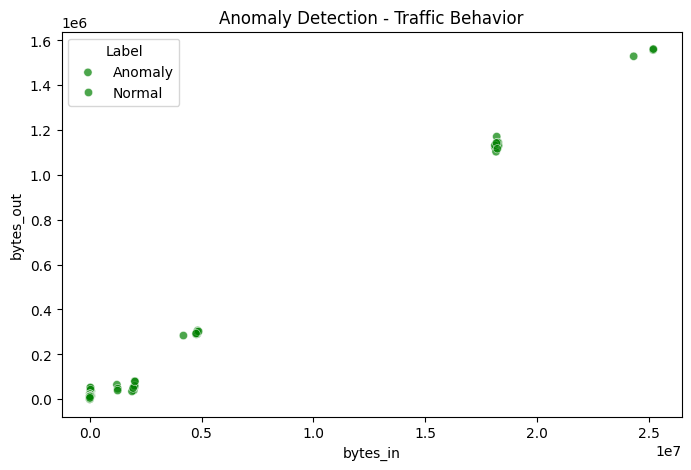

In [239]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='anomaly_label', palette={1:'green', -1:'red'}, alpha=0.7)
plt.title("Anomaly Detection - Traffic Behavior")
plt.legend(title='Label', labels=['Anomaly', 'Normal'])
plt.show()

# Model Evaluation & Interpretation

In [257]:
#Number of Anomalies Detected

In [249]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest.fit(scaled_features)
df['is_anomaly'] = (isolation_forest.predict(scaled_features) == -1).astype(int)
print(df['is_anomaly'].value_counts())  

is_anomaly
0    185
1     97
Name: count, dtype: int64


In [269]:
# Attack & Anomaly Frequency Over Time

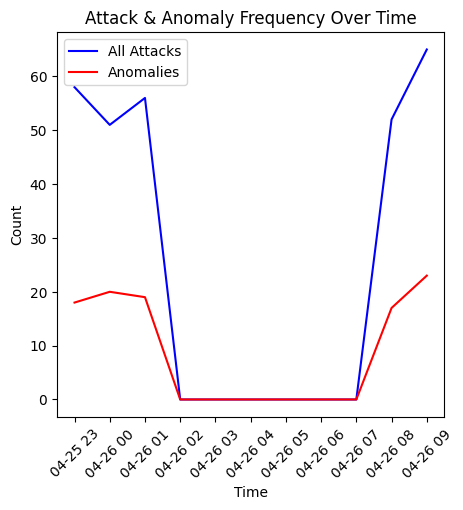

In [270]:
fig,ax=plt.subplots(figsize=(5,5))
df_all = df.copy()
df_anomaly = df[df['is_anomaly'] == 1].copy()
attack_counts = df_all.resample('H', on='time').size().reset_index(name='Attack Count')
anomaly_counts = df_anomaly.resample('H', on='time').size().reset_index(name='Anomaly Count')
ax.plot(attack_counts['time'], attack_counts['Attack Count'], label='All Attacks', color='blue')
ax.plot(anomaly_counts['time'], anomaly_counts['Anomaly Count'], label='Anomalies', color='red')
ax.set_title('Attack & Anomaly Frequency Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.show()

In [255]:
#Top Anomalous IPs / Patterns

In [254]:
top_anomalies = df[df['is_anomaly'] == 1]['src_ip'].value_counts().head()
print(top_anomalies)

src_ip
165.225.26.101    28
147.161.131.1     21
165.225.240.79    18
147.161.161.82    16
94.188.248.74     14
Name: count, dtype: int64


In [253]:
#Feature Importance for Anomalies

In [252]:
anomaly_features = df[df['is_anomaly'] == 1][['bytes_in', 'bytes_out']].describe()
normal_features = df[df['is_anomaly'] == 0][['bytes_in', 'bytes_out']].describe()
print(anomaly_features - normal_features)

           bytes_in     bytes_out
count -8.800000e+01 -8.800000e+01
mean  -1.509995e+06 -1.026135e+05
std   -4.456982e+06 -2.932044e+05
min    3.458000e+03  2.604000e+03
25%   -2.414000e+03 -4.740000e+02
50%   -2.025600e+04 -3.736000e+03
75%   -2.836200e+04 -1.404300e+04
max   -2.318583e+07 -1.481230e+06
